In [21]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score


In [22]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

In [23]:
# 데이터 로딩
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_openml

# 데이터 로딩
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

feature_names = housing.feature_names
boston = fetch_openml(name='boston')
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

feature_names = boston.feature_names

/opt/homebrew/lib/python3.11/site-packages/sklearn/datasets/_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Hypothesis Testing

In [26]:
#Multiple Regression
model = sm.OLS(y.astype(float), X.astype(float))
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Mon, 25 Sep 2023   Prob (F-statistic):                        0.00
Time:                        00:40:18   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Shrinkage Models

In [30]:

X_train, X_test, y_train, y_test = train_test_split(X.astype(float), y.astype(float), test_size=0.2, random_state=42)


# 선형 회귀 모델 생성 및 학습
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 예측
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# MSE 계산
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# R-squared 계산
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 결과 출력
print(f"Linear Regression Coefficients: {lin_reg.coef_}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")

Linear Regression Coefficients: [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
Train MSE: 21.641412753226312
Test MSE: 24.29111947497418
Train R2: 0.7508856358979673
Test R2: 0.6687594935356229


In [31]:

# Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# 예측
y_train_pred = ridge_reg.predict(X_train)
y_test_pred = ridge_reg.predict(X_test)

# MSE 계산
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# R-squared 계산
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 결과 출력
print(f"Ridge Regression Coefficients: {lin_reg.coef_}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")

# 라쏘 회귀
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
print(f"Lasso Regression Coefficients: {lasso_reg.coef_}")


Ridge Regression Coefficients: [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
Train MSE: 21.82411829157586
Test MSE: 24.477191227708662
Train R2: 0.7487825119234439
Test R2: 0.6662221670168521
Lasso Regression Coefficients: [-0.07660927  0.02850064 -0.          0.         -0.          1.63048892
  0.01639478 -0.63085765  0.21965363 -0.01228558 -0.70858233  0.0111811
 -0.74710661]


In [32]:

# Lasso
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)

# 예측
y_train_pred = lasso_reg.predict(X_train)
y_test_pred = lasso_reg.predict(X_test)

# MSE 계산
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# R-squared 계산
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 결과 출력
print(f"Lasso Regression Coefficients: {lin_reg.coef_}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")


Lasso Regression Coefficients: [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
Train MSE: 26.416866673122932
Test MSE: 24.409489761299707
Train R2: 0.6959153721670908
Test R2: 0.6671453631686304


# Lasso vs Ridge

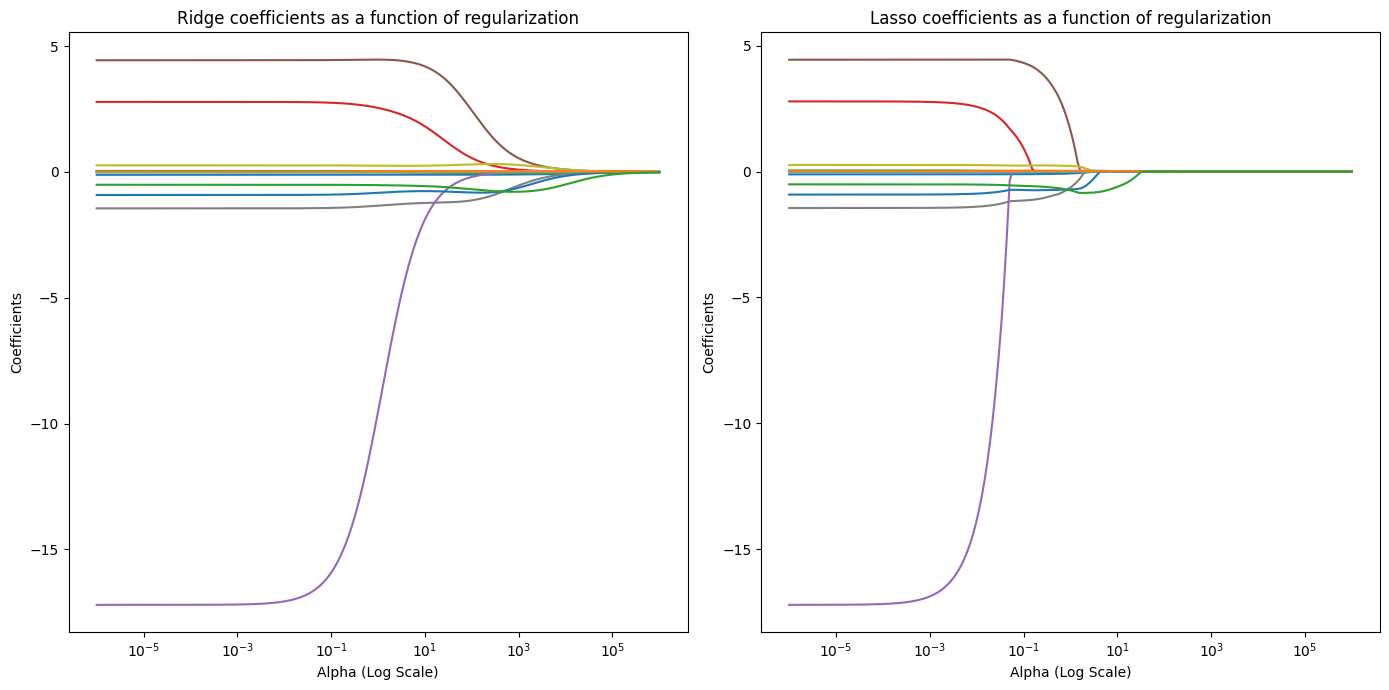

In [33]:

# Alpha 값 설정 (0에서 높은 값까지)
alphas = np.logspace(-6, 6, 200)

# 계수 저장을 위한 배열 초기화
ridge_coefs = []
lasso_coefs = []

# Ridge와 Lasso를 다양한 alpha 값에 대해 훈련
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)
    
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_coefs.append(lasso.coef_)

# 계수를 numpy array로 변환
ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

# 그림 그리기
plt.figure(figsize=(14, 7))

# Ridge 그림
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, ridge_coefs)
ax.set_xscale('log')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of regularization')

# Lasso 그림
plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, lasso_coefs)
ax.set_xscale('log')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of regularization')

plt.tight_layout()
plt.show()